## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# from sklearn.metrics import roc

## Reading data

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')

In [3]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Exploratory Data Analysis

In [4]:
data.shape

(2938, 22)

In [5]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
data['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [9]:
len(data['Country'].unique())

193

<AxesSubplot: xlabel='Alcohol', ylabel='Count'>

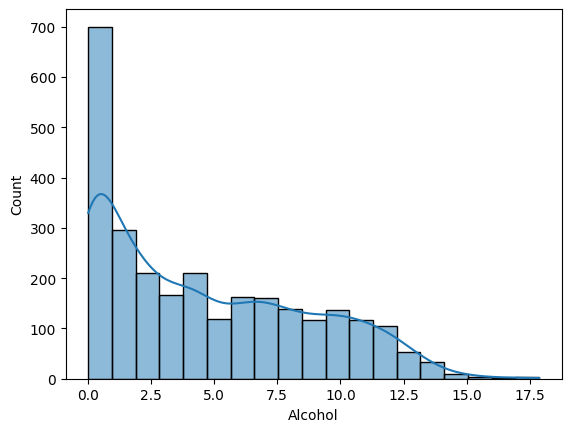

In [10]:
sns.histplot(data['Alcohol'], kde=True)

<AxesSubplot: xlabel='Life expectancy', ylabel='Count'>

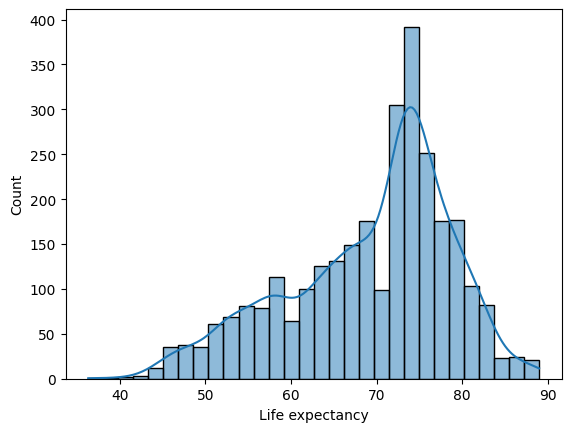

In [11]:
sns.histplot(data['Life expectancy'], kde=True)

In [12]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

/tmp/ipykernel_10182/2343640170.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

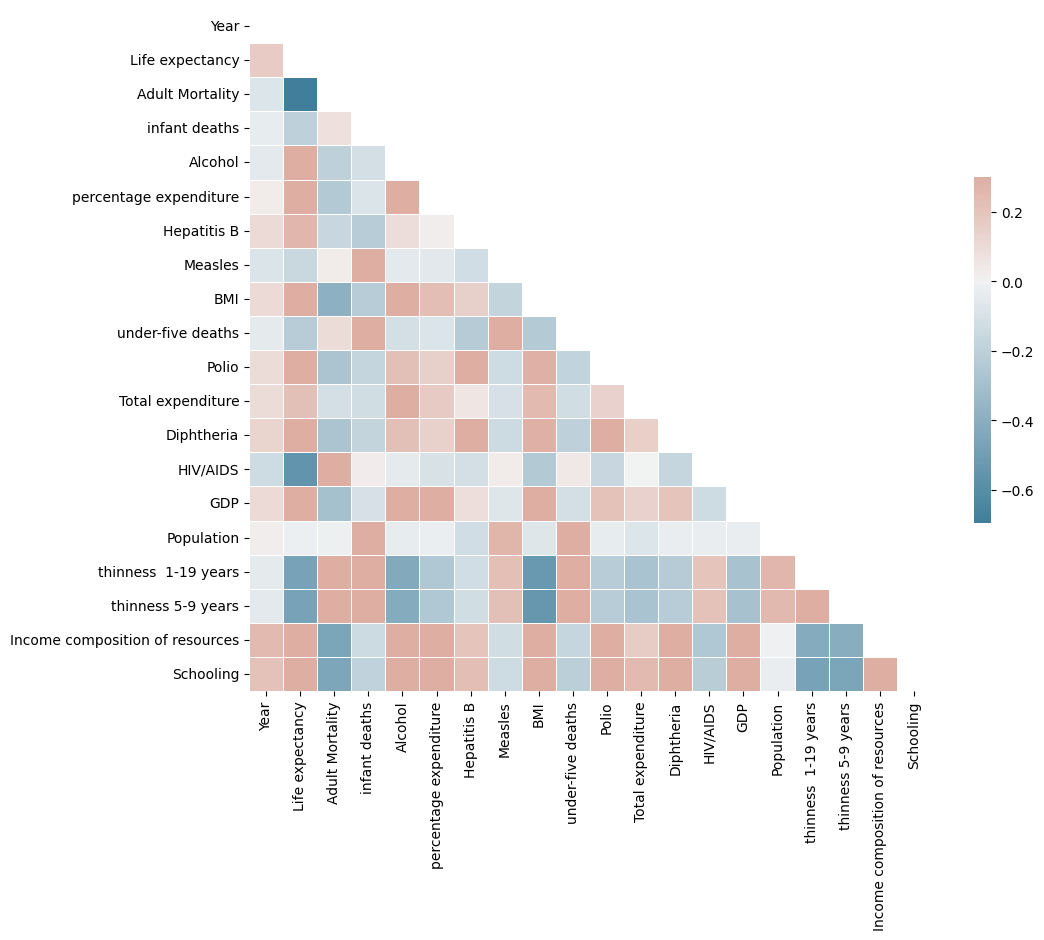

In [13]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: xlabel='Adult Mortality', ylabel='Count'>

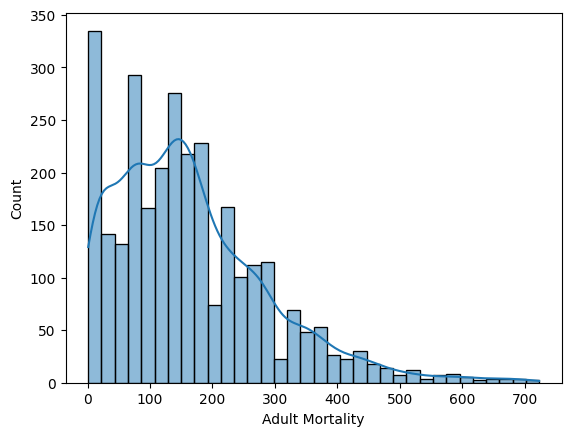

In [14]:
sns.histplot(data['Adult Mortality'], kde=True)

<AxesSubplot: xlabel='Year', ylabel='Count'>

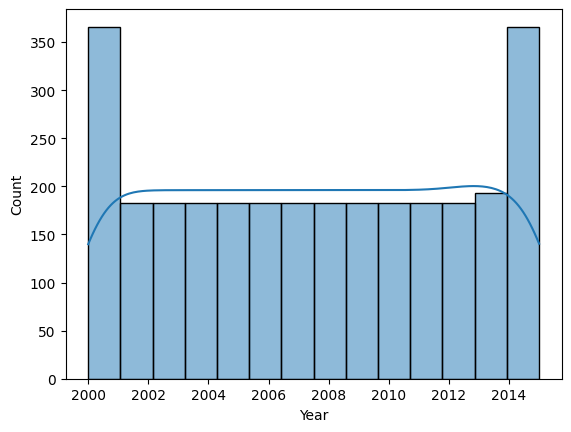

In [15]:
sns.histplot(data['Year'], kde=True)

<AxesSubplot: xlabel='infant deaths', ylabel='Count'>

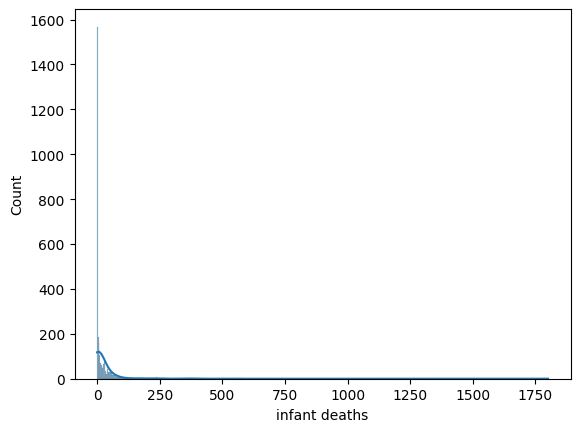

In [16]:
sns.histplot(data['infant deaths'], kde=True)

/tmp/ipykernel_10182/4288923295.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(abs(data.corr()['Life expectancy'].drop('Life expectancy')*100).sort_values(ascending=False)).plot.bar()


<AxesSubplot: >

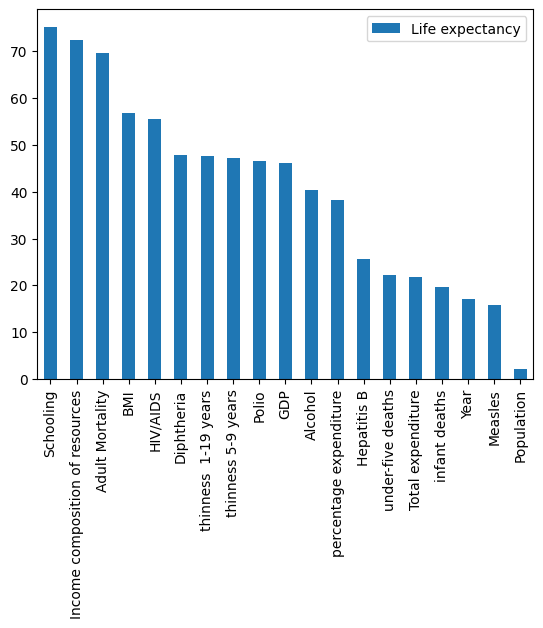

In [17]:
pd.DataFrame(abs(data.corr()['Life expectancy'].drop('Life expectancy')*100).sort_values(ascending=False)).plot.bar()

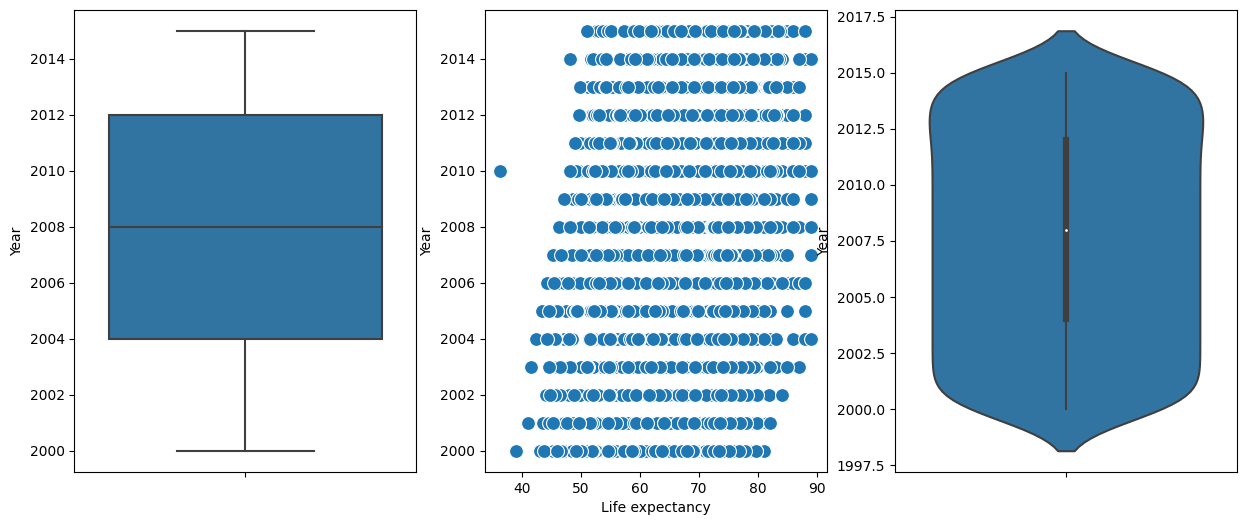

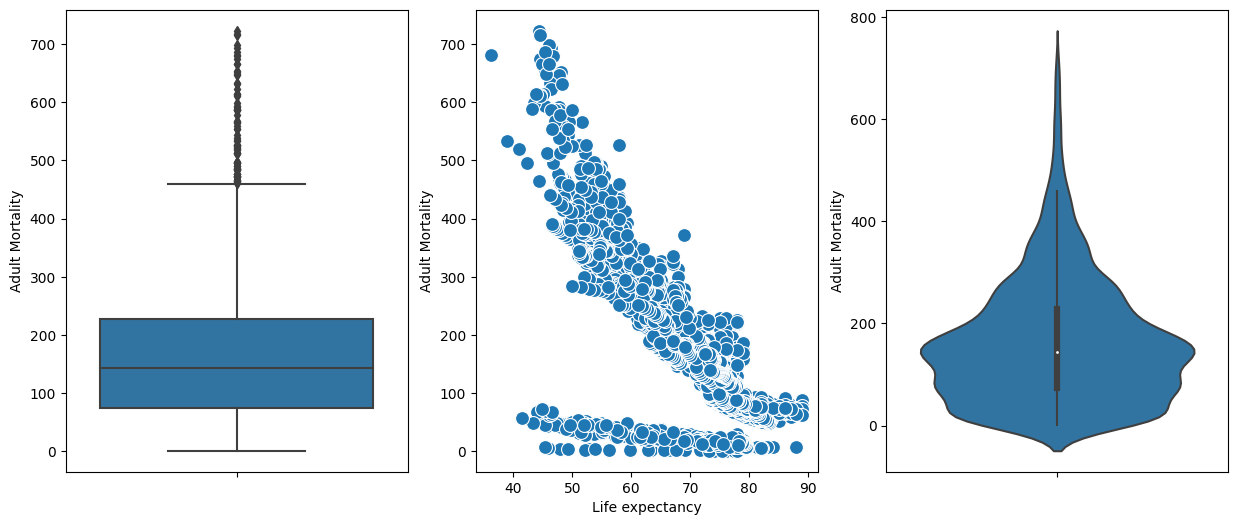

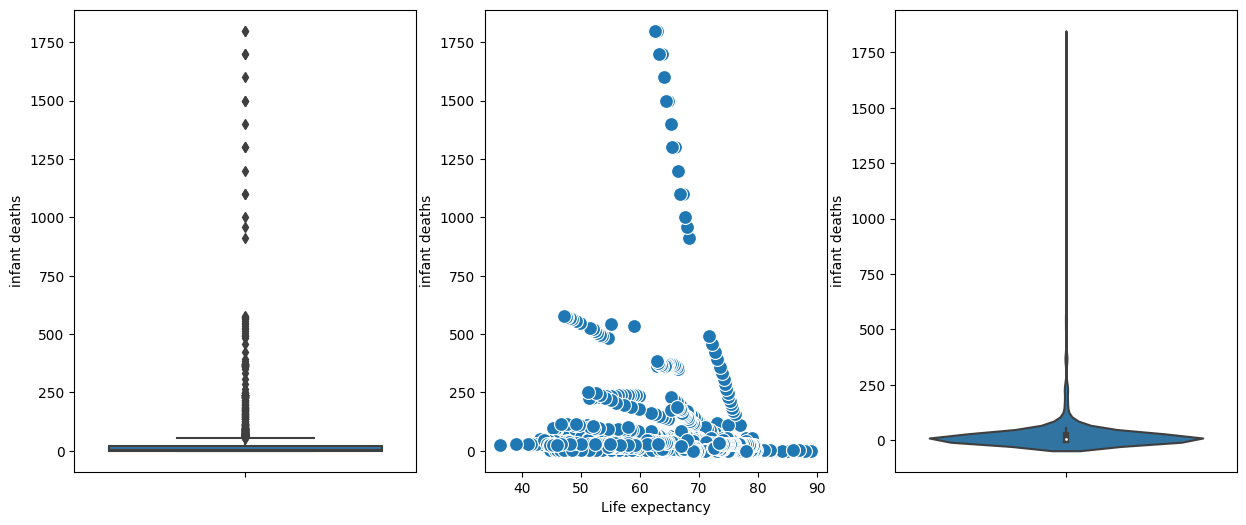

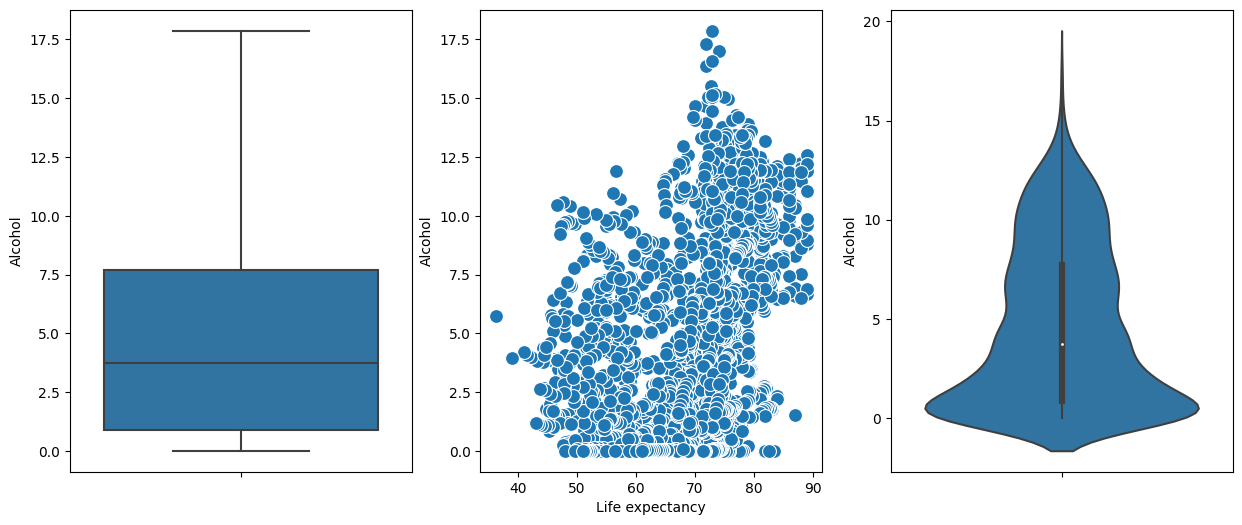

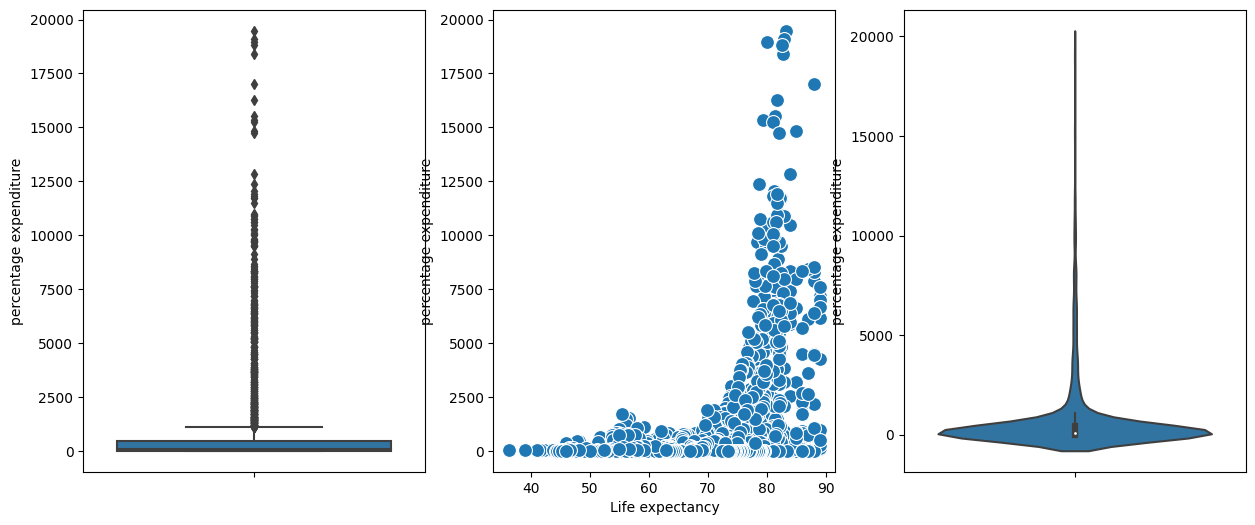

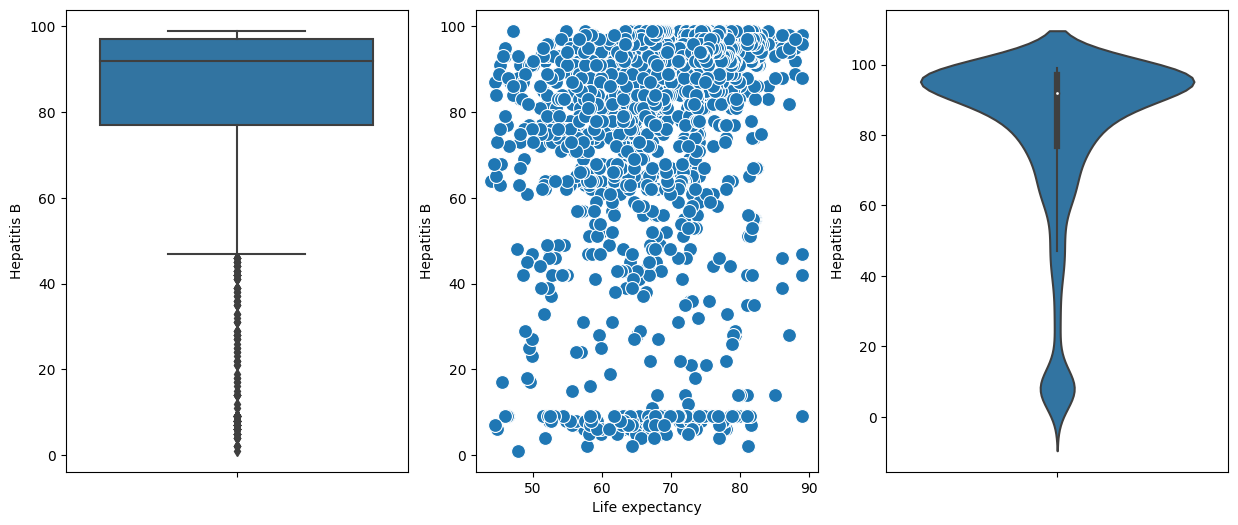

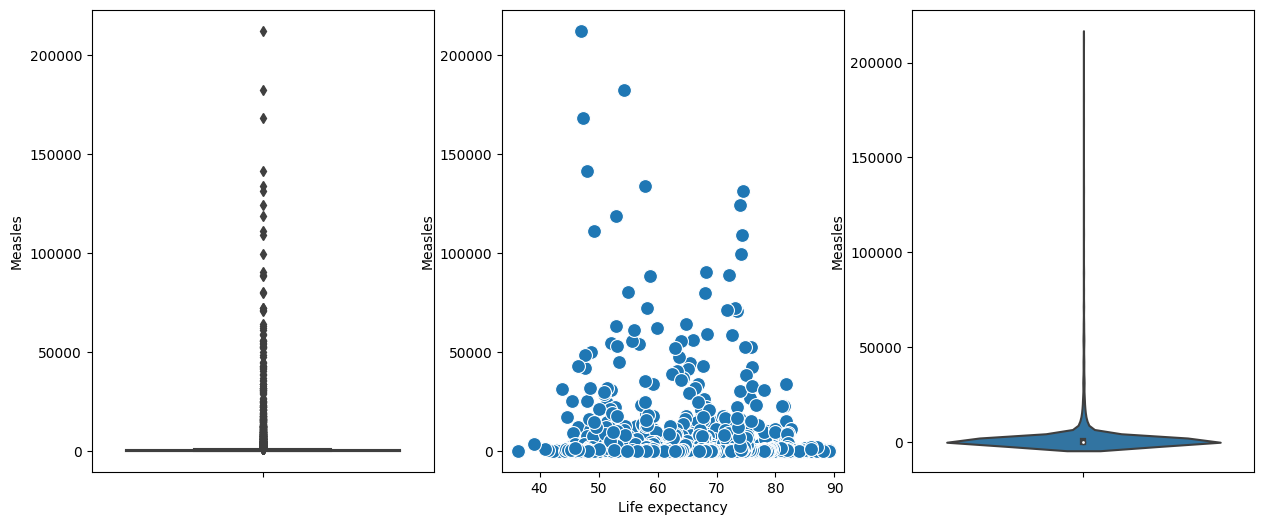

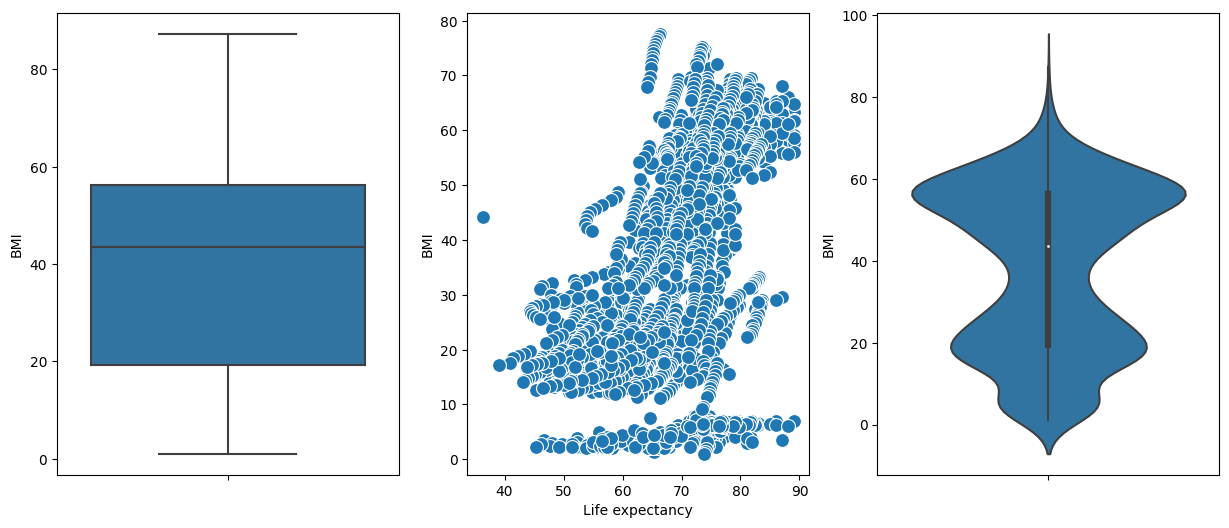

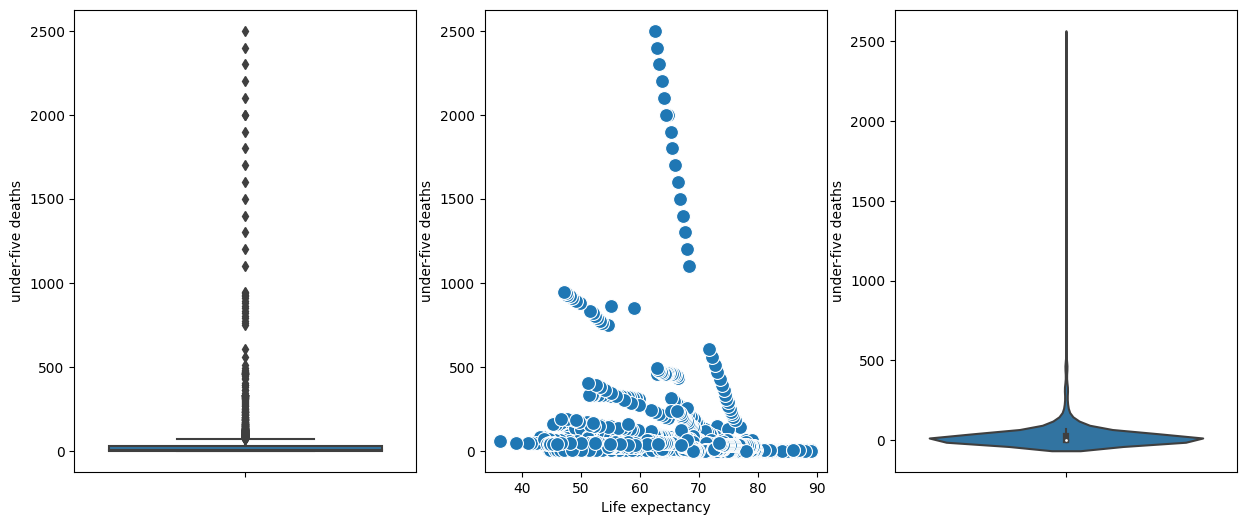

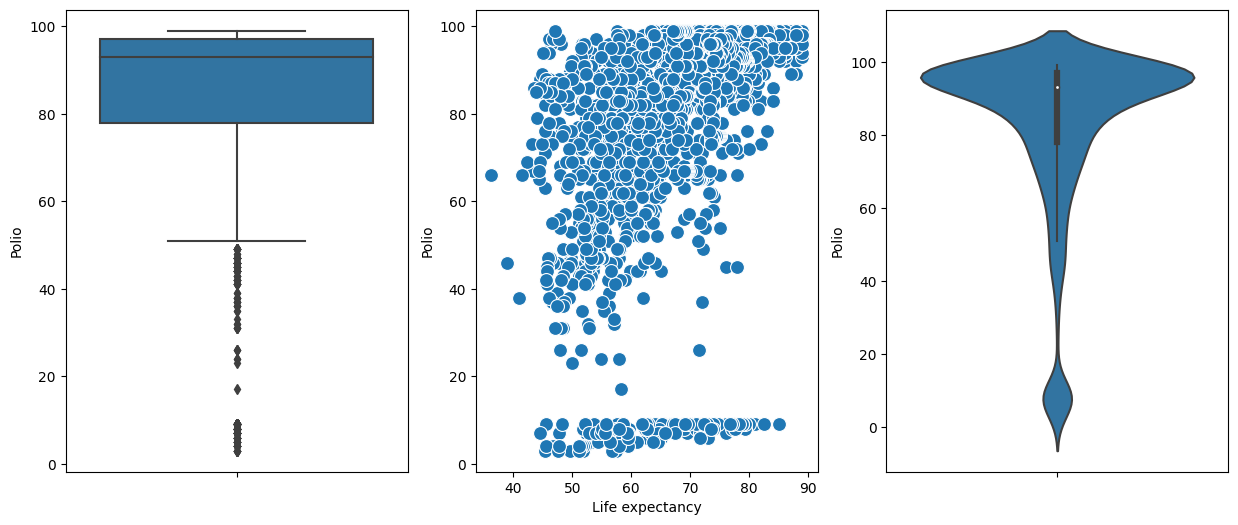

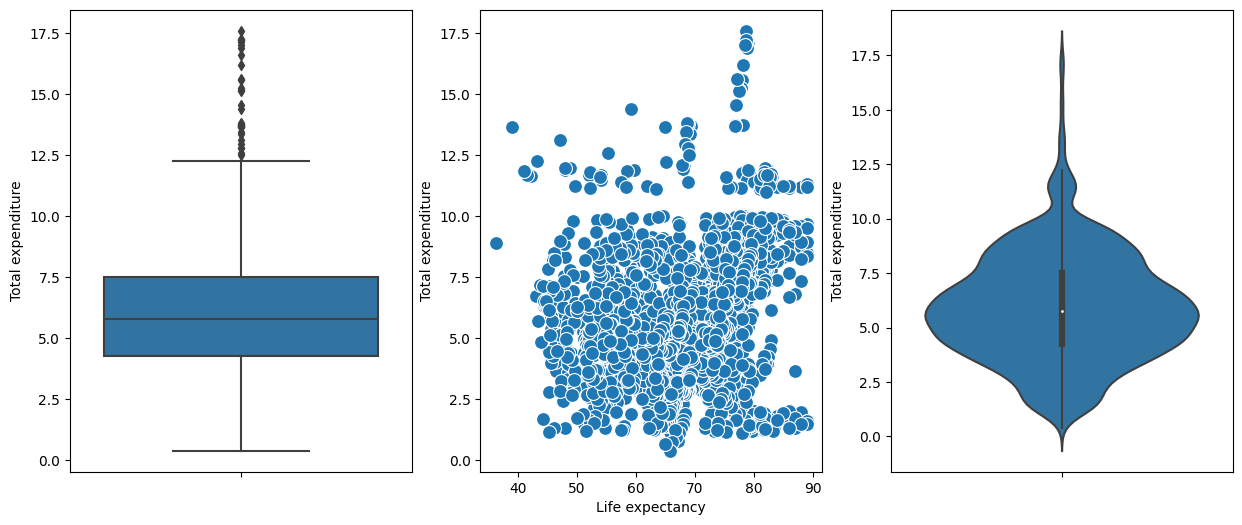

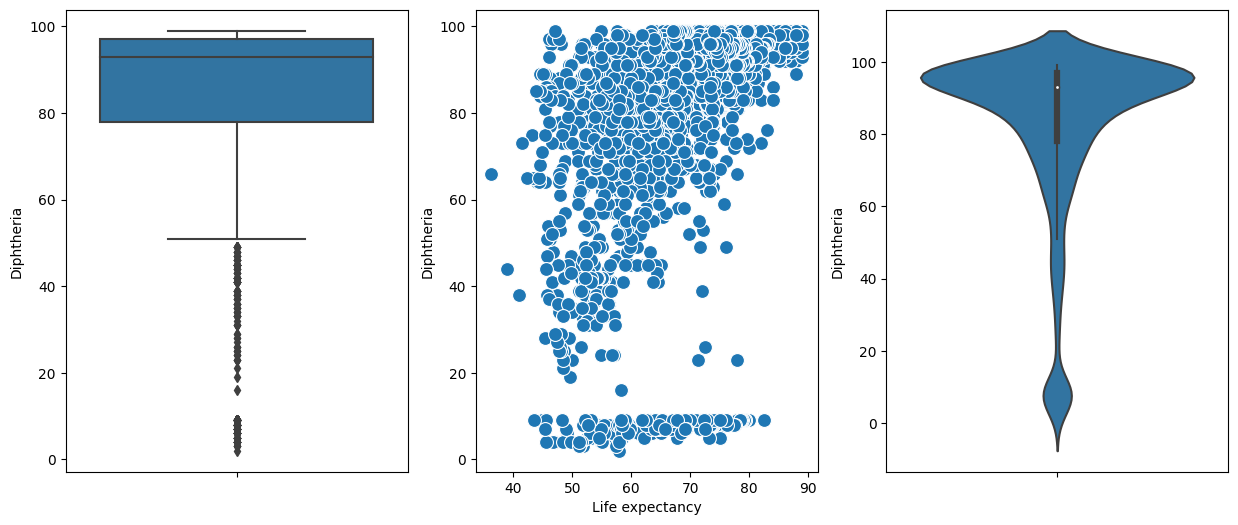

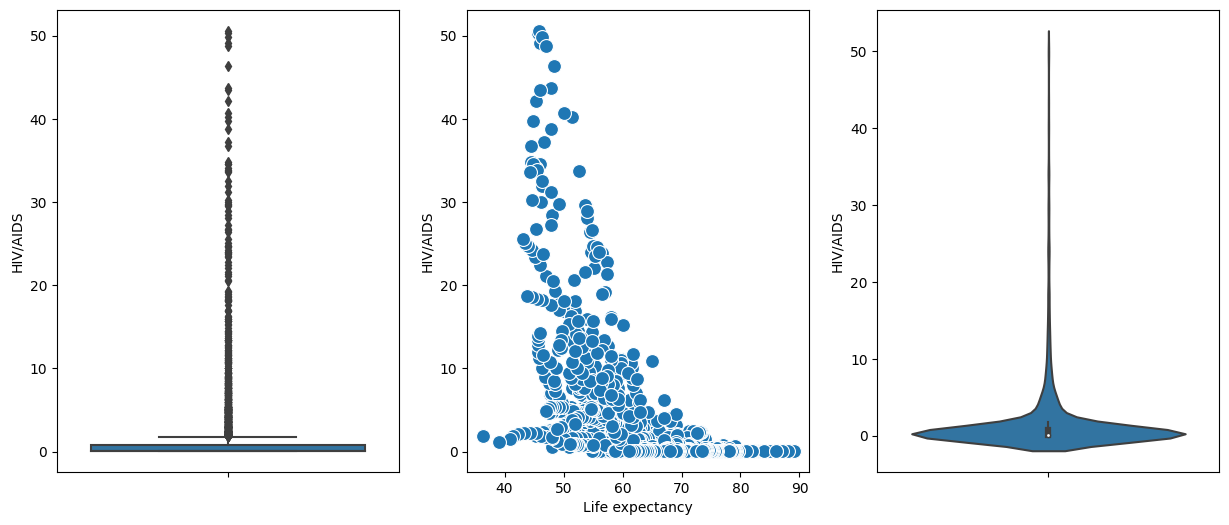

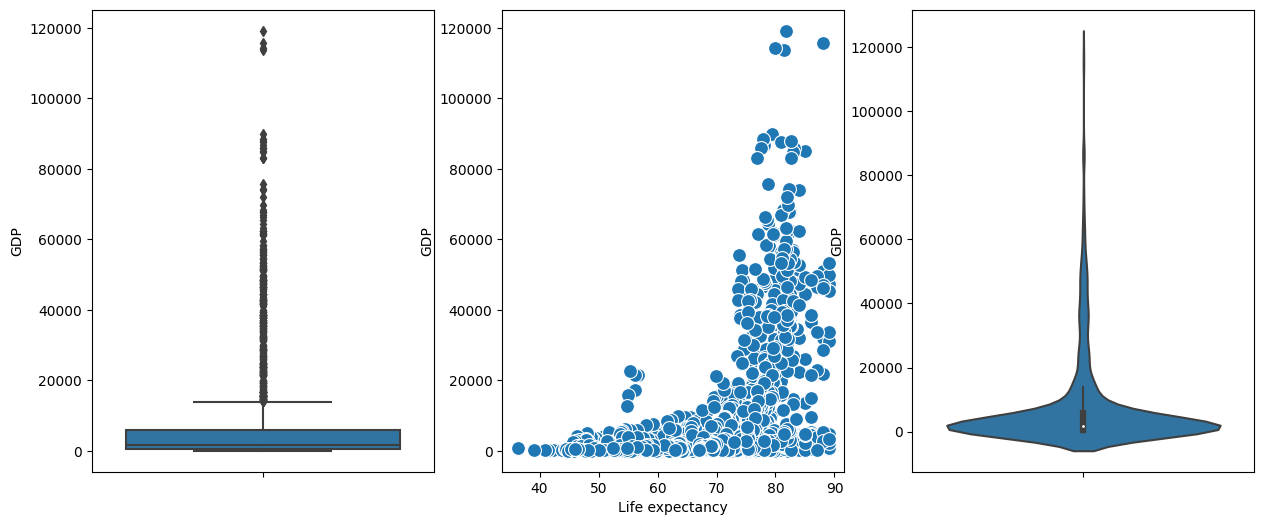

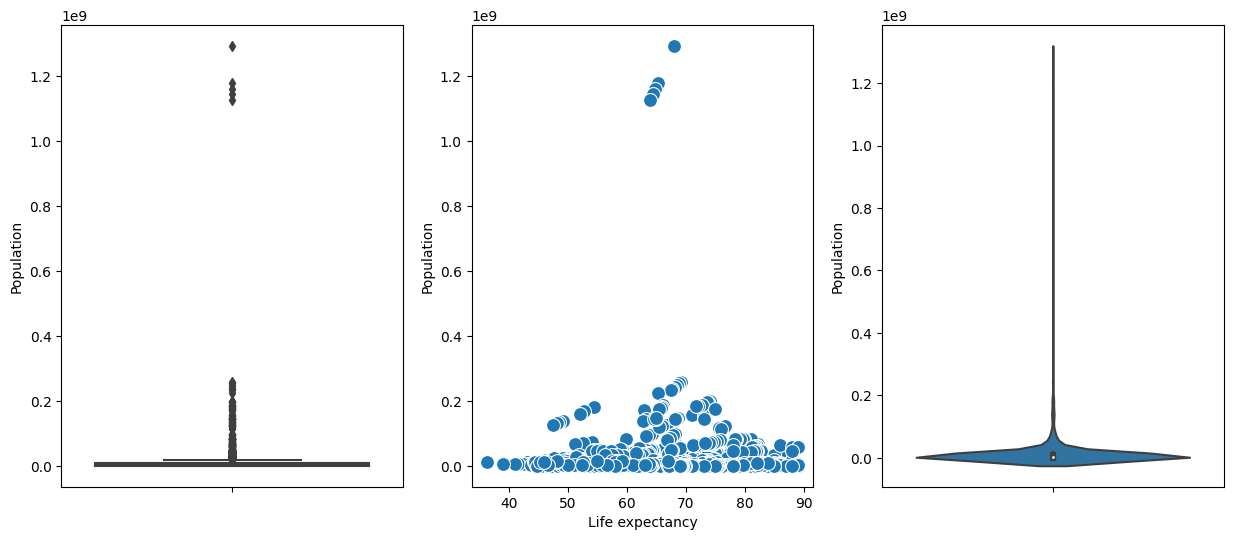

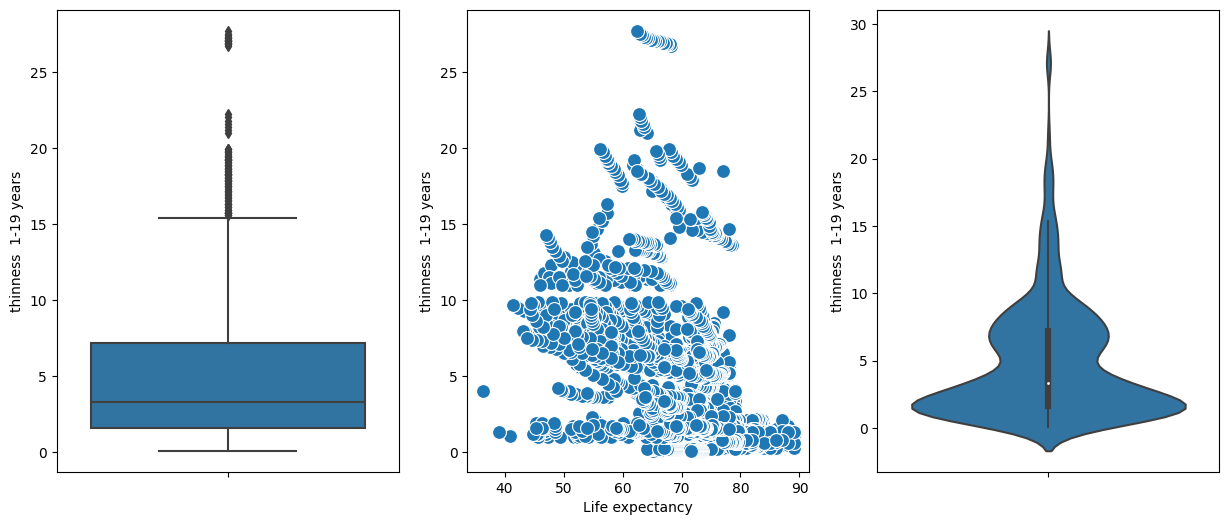

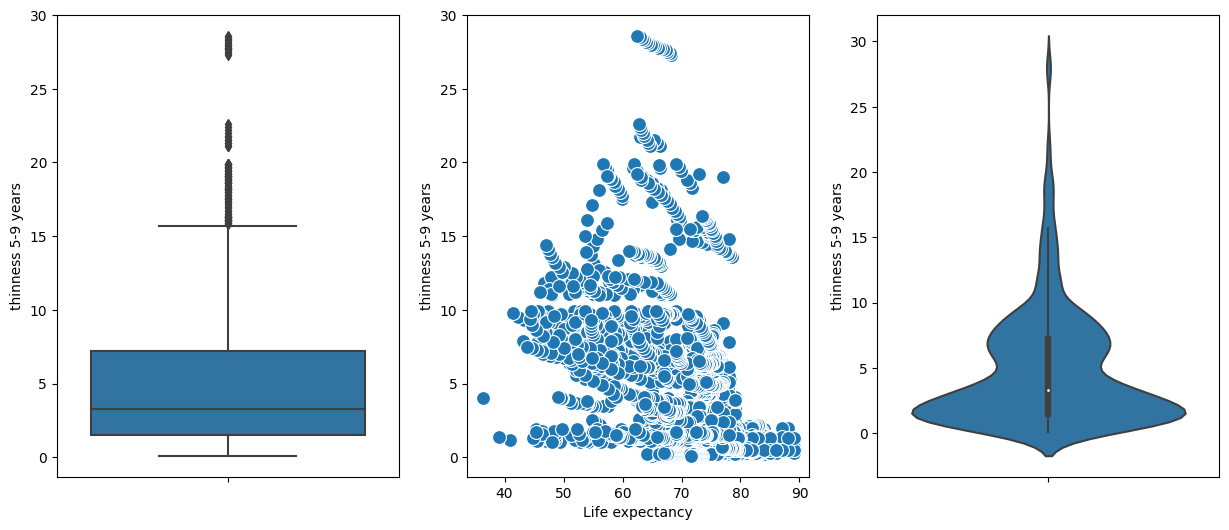

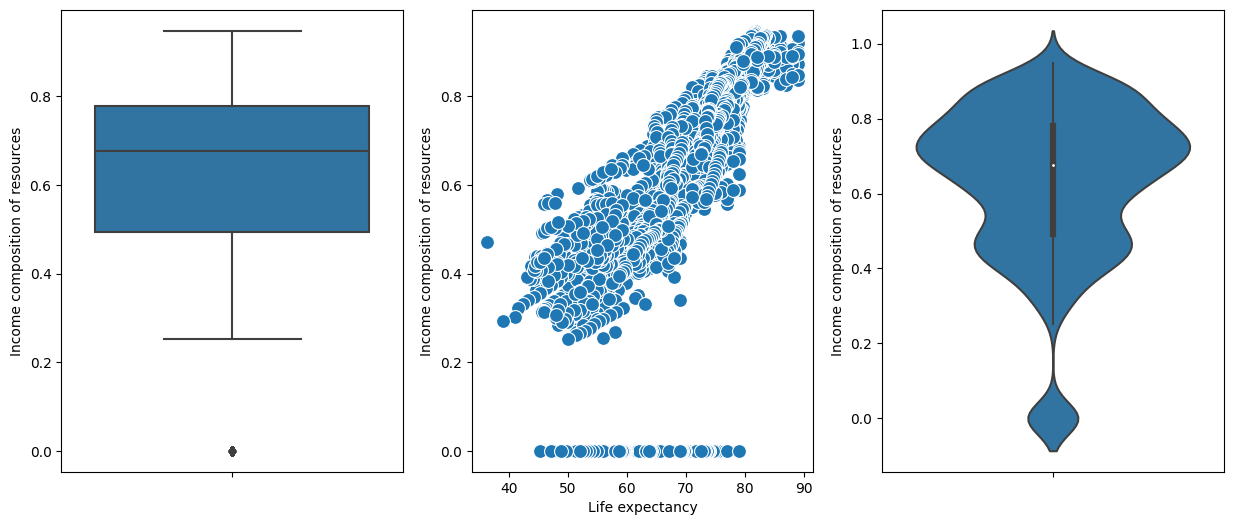

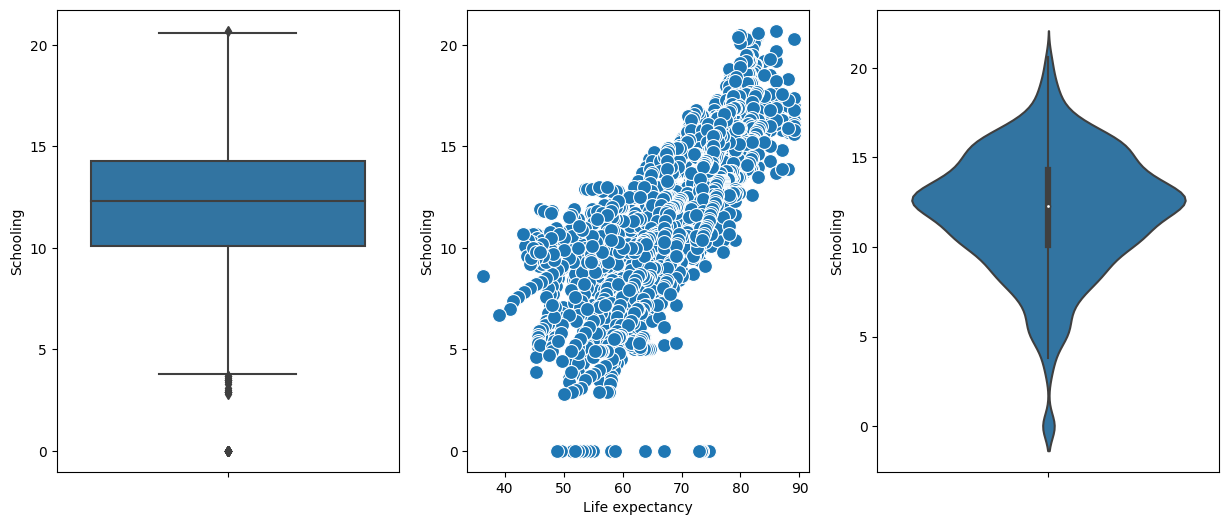

In [18]:
features = data.select_dtypes(exclude='object').columns.drop("Life expectancy").tolist()
for col in features:
    print("\n")
    fig, ax =plt.subplots(1,3, figsize=(15,6))
    sns.boxplot(data=data, y=col, ax=ax[0])
    sns.scatterplot(data=data,x = 'Life expectancy', s = 100, y=col, ax=ax[1])
    sns.violinplot(data=data, s = 100, y=col, ax=ax[2])
    plt.show()

## Data Preprocessing

In [19]:
# Replacing the Null Values with the mean values of the data using the Simple Imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)
data['Life expectancy'] = imputer.fit_transform(data[['Life expectancy']])
data['Adult Mortality'] = imputer.fit_transform(data[['Adult Mortality']])
data['Alcohol'] = imputer.fit_transform(data[['Alcohol']])
data['Hepatitis B'] = imputer.fit_transform(data[['Hepatitis B']])
data['BMI'] = imputer.fit_transform(data[['BMI']])
data['Polio'] = imputer.fit_transform(data[['Polio']])
data['Total expenditure'] = imputer.fit_transform(data[['Total expenditure']])
data['Diphtheria'] = imputer.fit_transform(data[['Diphtheria']])
data['GDP'] = imputer.fit_transform(data[['GDP']])
data['Population'] = imputer.fit_transform(data[['Population']])
data['thinness  1-19 years'] = imputer.fit_transform(data[['thinness  1-19 years']])
data['thinness 5-9 years'] = imputer.fit_transform(data[['thinness 5-9 years']])
data['Income composition of resources'] = imputer.fit_transform(data[['Income composition of resources']])
data['Schooling'] = imputer.fit_transform(data[['Schooling']])

In [20]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [21]:
# encoding the  country and status columns
status_encoder = LabelEncoder()
country_encoder = LabelEncoder()

In [22]:
data['Status'] = status_encoder.fit_transform(data['Status'])
data['Country'] = country_encoder.fit_transform(data['Country'])

In [23]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [24]:
# Separate target from features
Y = data['Life expectancy']
X = data.drop(columns=['Life expectancy', 'Population'], axis=1)

In [25]:
X.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [26]:
Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [27]:
# Separate training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [28]:
x_train.shape

(2056, 20)

In [29]:
x_test.shape

(882, 20)

In [30]:
y_train.shape

(2056,)

In [31]:
y_test.shape

(882,)

## Model

In [32]:
#Define the model Multivariate Linear Regression
regres = LinearRegression()

In [33]:
# Train the model
model = regres.fit(x_train, y_train)

In [34]:
#coefficients of the linear regression model
model.coef_

array([ 3.18413292e-03,  2.45051782e-03, -1.52990195e+00, -1.97706520e-02,
        1.00508417e-01,  6.52858312e-02,  1.18808882e-04, -1.51918028e-02,
       -2.53514899e-05,  4.13251129e-02, -7.45049334e-02,  2.30412890e-02,
        2.46295679e-02,  3.87756424e-02, -4.82948884e-01,  3.05273495e-05,
       -7.82350362e-02,  9.73727072e-03,  6.05302380e+00,  6.78167277e-01])

In [35]:
#y-intercept of the model
model.intercept_

51.77573225029116

In [36]:
model.score(x_train, y_train)

0.8182771086355067

In [37]:
#Predict the testing set
prediction = model.predict(x_test)

## Performance Evaluation

In [38]:
mean_squared_error(y_test, prediction, squared=False)

4.073194543300827

In [39]:
score = r2_score(y_test, prediction)
print('r2 score is ', score)

r2 score is  0.8224643273378405


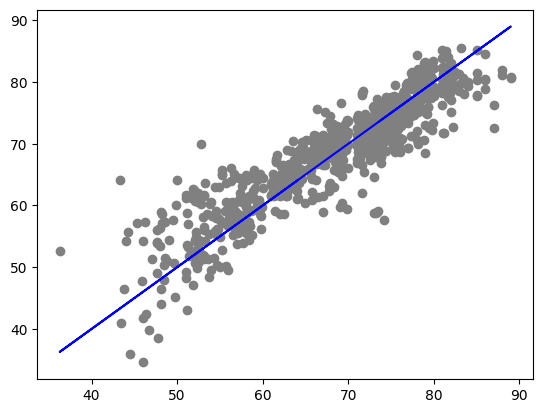

In [40]:
plt.scatter(y_test, prediction, color='grey')
plt.plot(y_test, y_test, 'b')